<a href="https://colab.research.google.com/github/fralfaro/MAT306/blob/main/docs/labs/lab_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT306 - Laboratorio N°06


**Objetivo**: Aplicar técnicas básicas de **Machine Learning**, desde la preparación de datos hasta el entrenamiento y evaluación de modelos.




<p align="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Anscombe%27s_quartet_3.svg/1200px-Anscombe%27s_quartet_3.svg.png" width="500"/>
</p>

El **cuarteto de Anscombe** es un ejemplo clásico en estadística que ilustra cómo diferentes conjuntos de datos pueden compartir las mismas propiedades estadísticas, como media, varianza y correlación, pero presentan comportamientos muy distintos cuando se visualizan gráficamente. Cada uno de los cuatro conjuntos consiste en once puntos (x, y) y fue creado por el estadístico F. J. Anscombe en 1973. Esta herramienta resalta la importancia de la visualización de datos para evitar interpretaciones erróneas basadas únicamente en análisis numéricos.

**Descripción del conjunto**

1. **Propiedades estadísticas comunes:** Todos los conjuntos tienen el mismo valor promedio para las variables \(x\) e \(y\), la misma varianza para \(x\) e \(y\), y una correlación lineal idéntica.
2. **Diferencias gráficas:** A pesar de sus similitudes estadísticas, los cuatro conjuntos presentan gráficos muy distintos:
   - El primer conjunto muestra una relación lineal simple.
   - El segundo conjunto tiene una relación no lineal, con una curva clara.
   - El tercer conjunto tiene una relación lineal clara, pero con un punto atípico que influye significativamente.
   - El cuarto conjunto tiene la mayoría de los puntos alineados verticalmente, con un punto atípico que afecta la correlación.

Este cuarteto enfatiza que las estadísticas descriptivas por sí solas pueden no capturar la esencia completa de los datos, subrayando la necesidad de utilizar visualizaciones en cualquier análisis exploratorio de datos.

In [3]:
# Importar las bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Configuración de los gráficos
%matplotlib inline
sns.set_theme(style="whitegrid")  # Establece un tema general para los gráficos
sns.set_palette("deep", desat=0.6)
plt.rcParams['figure.figsize'] = (12, 8)  # Ajuste del tamaño de las figuras

# Cargar los datos del cuarteto de Anscombe
data = sns.load_dataset("anscombe")

# Mostrar las primeras filas del conjunto de datos
data.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [ ]:
data

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


Con base en la información presentada y el análisis realizado, les invitamos a reflexionar y responder las siguientes preguntas. Estas preguntas están diseñadas para profundizar en su comprensión del cuarteto de Anscombe y fomentar un análisis crítico de los datos:



1. Cree un gráfico de dispersión (scatter plot) para cada uno de los cuatro grupos del cuarteto de Anscombe. A partir de la visualización, ¿puede identificar diferencias significativas entre los grupos? ¿Qué características particulares observa en cada uno que sugieren comportamientos distintos?



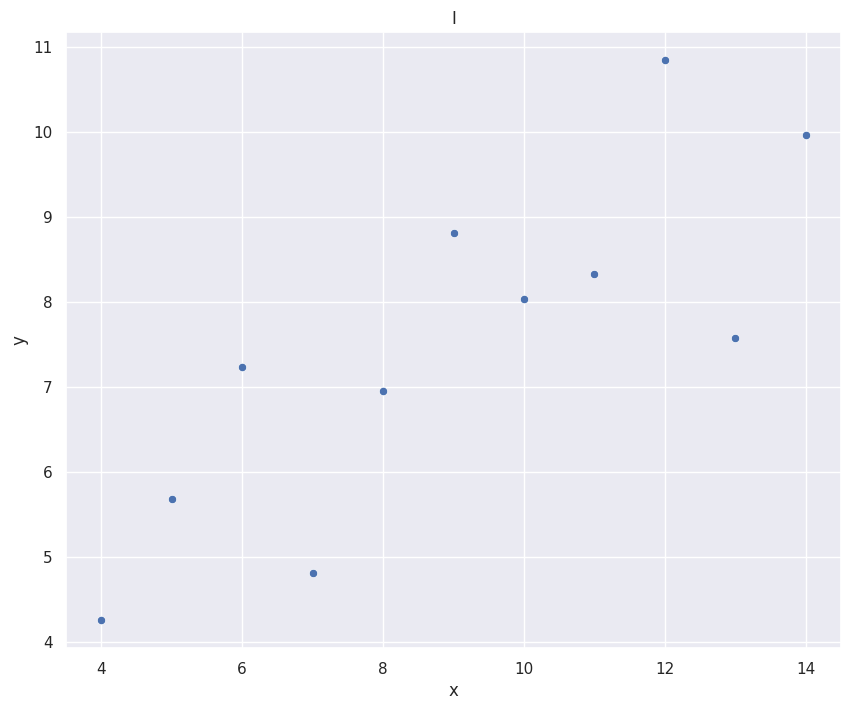

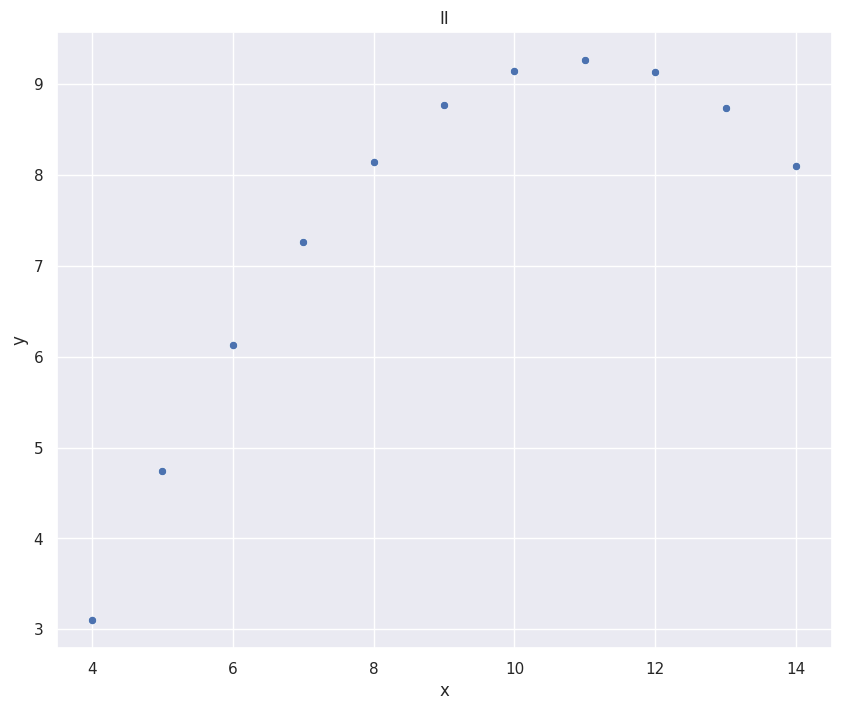

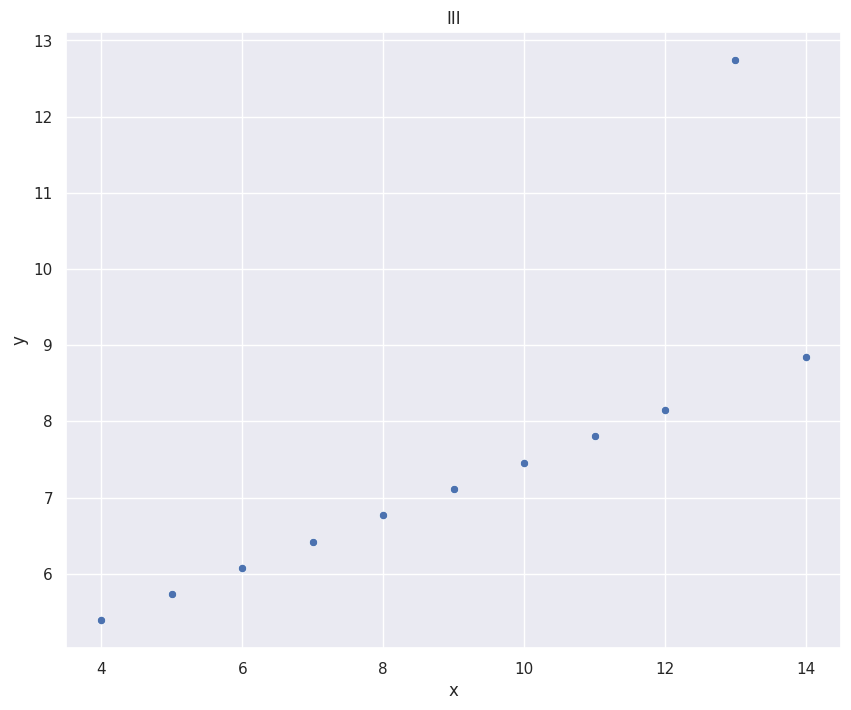

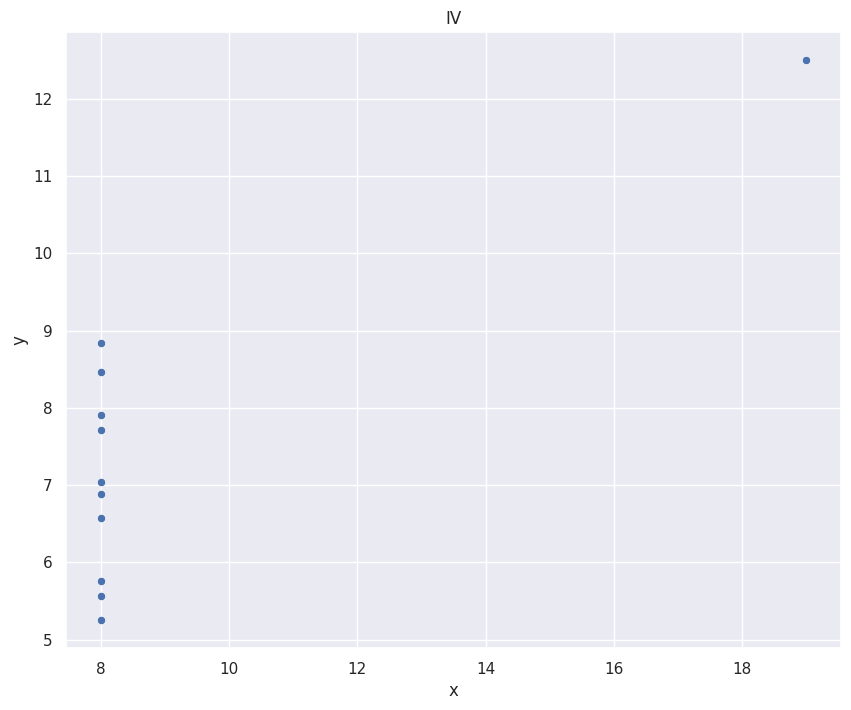

In [15]:
#I

sns.set(rc={'figure.figsize':(10,8)})
sns.scatterplot(
    x='x',
    y='y',
    data=data[data['dataset'] == 'I'],
)

plt.title('I')

plt.show()

#II

sns.set(rc={'figure.figsize':(10,8)})
sns.scatterplot(
    x='x',
    y='y',
    data=data[data['dataset'] == 'II'],
)

plt.title('II')

plt.show()

#III

sns.set(rc={'figure.figsize':(10,8)})
sns.scatterplot(
    x='x',
    y='y',
    data=data[data['dataset'] == 'III'],
)

plt.title('III')

plt.show()

#IV

sns.set(rc={'figure.figsize':(10,8)})
sns.scatterplot(
    x='x',
    y='y',
    data=data[data['dataset'] == 'IV'],
)

plt.title('IV')

plt.show()



Sí se ven diferencias significativas para los grupos entre todos los grupos. El grupo uno se ve muy equidisperso por una zona, el grupo dos se ve una cuadráticas, el grupos tres como una lineal pero presenta un outier y el grupo cuatro como una línea paralela al eje Y, pero también presenta un outlier.

2. Utilice el comando `describe` para generar un resumen de las medidas estadísticas más relevantes para cada uno de los grupos del cuarteto de Anscombe. A partir de estos resultados, interprete las estadísticas obtenidas, destacando las características más significativas de cada grupo y cómo pueden influir en la comprensión de sus respectivas distribuciones.


In [ ]:
summary = data.groupby('dataset')[['x', 'y']].describe()

In [ ]:
summary

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

Podemos ver que efectivamente las desviación estándar y el promedio son iguales en todos los grupos.

3. Ajuste un modelo de regresión lineal para cada grupo utilizando **sklearn**. Calcule las métricas de evaluación, como el error cuadrático medio (MSE) y R², y grafique los resultados de la regresión. Interprete los resultados y su impacto en la calidad del ajuste.



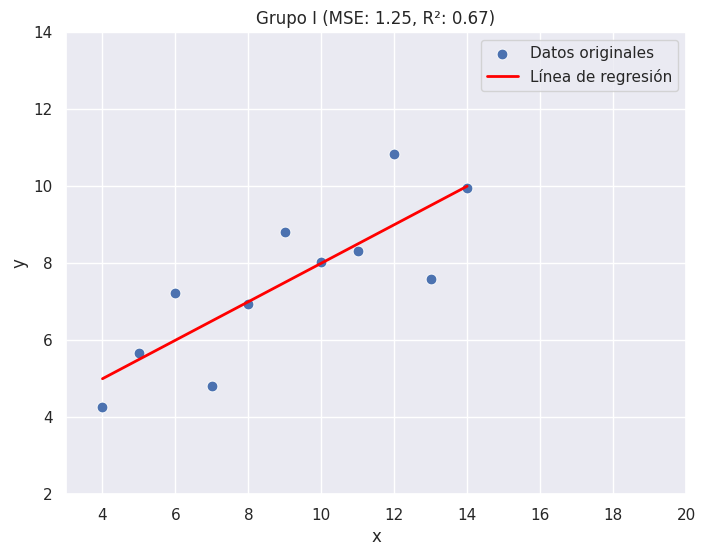

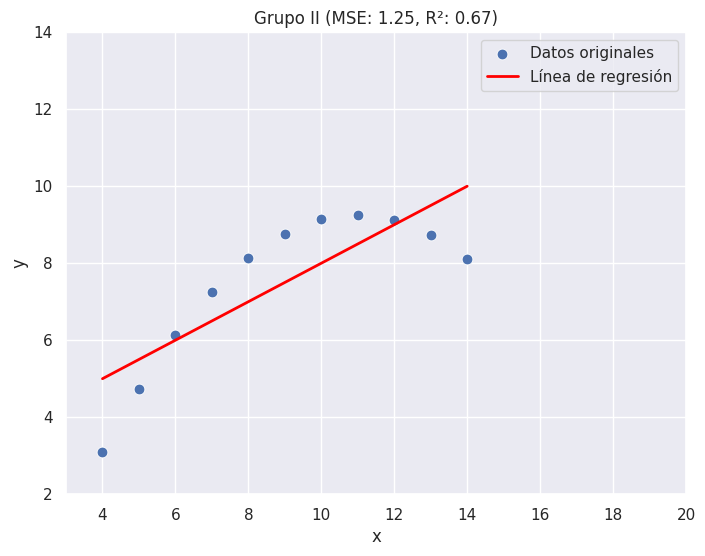

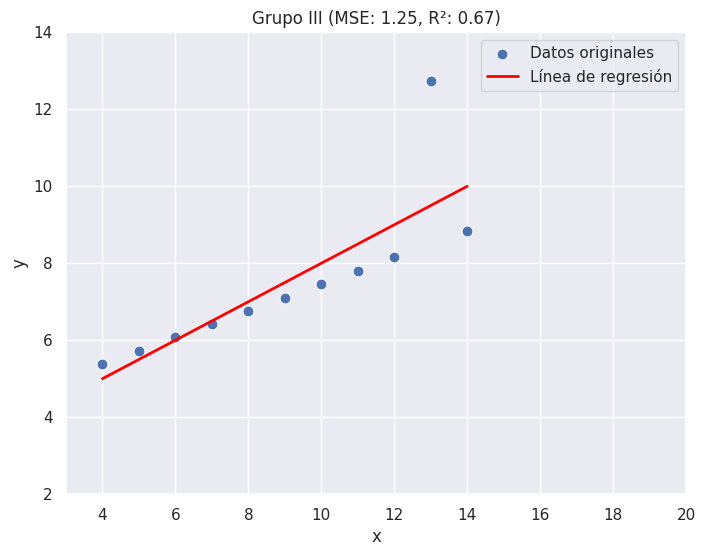

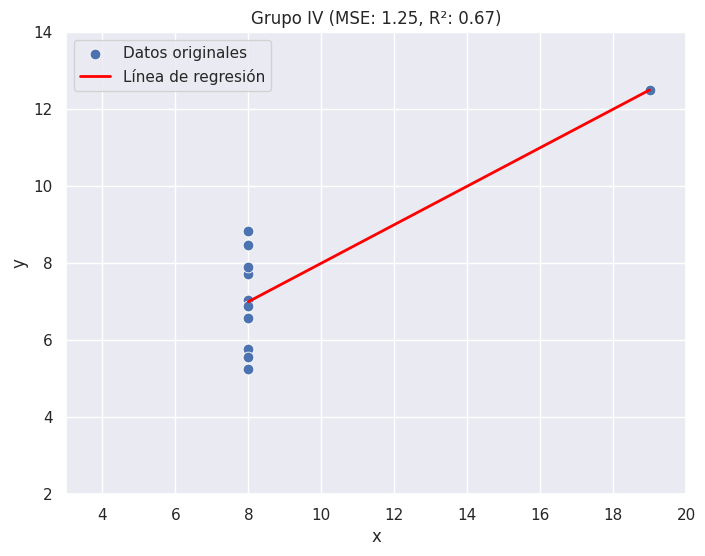

In [16]:
# --- Modelo y Gráfico para el Grupo I ---
subset_I = data[data['dataset'] == 'I']
X_I = subset_I[['x']]
y_I = subset_I['y']
model_I = LinearRegression()
model_I.fit(X_I, y_I)
y_pred_I = model_I.predict(X_I)
mse_I = mean_squared_error(y_I, y_pred_I)
r2_I = r2_score(y_I, y_pred_I)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=subset_I, x='x', y='y', label='Datos originales', s=60)
sns.lineplot(x=X_I['x'], y=y_pred_I, color='red', linewidth=2, label='Línea de regresión')
plt.title(f'Grupo I (MSE: {mse_I:.2f}, R²: {r2_I:.2f})')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(3, 20)
plt.ylim(2, 14)
plt.legend()
plt.show()

# --- Modelo y Gráfico para el Grupo II ---
subset_II = data[data['dataset'] == 'II']
X_II = subset_II[['x']]
y_II = subset_II['y']
model_II = LinearRegression()
model_II.fit(X_II, y_II)
y_pred_II = model_II.predict(X_II)
mse_II = mean_squared_error(y_II, y_pred_II)
r2_II = r2_score(y_II, y_pred_II)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=subset_II, x='x', y='y', label='Datos originales', s=60)
sns.lineplot(x=X_II['x'], y=y_pred_II, color='red', linewidth=2, label='Línea de regresión')
plt.title(f'Grupo II (MSE: {mse_II:.2f}, R²: {r2_II:.2f})')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(3, 20)
plt.ylim(2, 14)
plt.legend()
plt.show()

# --- Modelo y Gráfico para el Grupo III ---
subset_III = data[data['dataset'] == 'III']
X_III = subset_III[['x']]
y_III = subset_III['y']
model_III = LinearRegression()
model_III.fit(X_III, y_III)
y_pred_III = model_III.predict(X_III)
mse_III = mean_squared_error(y_III, y_pred_III)
r2_III = r2_score(y_III, y_pred_III)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=subset_III, x='x', y='y', label='Datos originales', s=60)
sns.lineplot(x=X_III['x'], y=y_pred_III, color='red', linewidth=2, label='Línea de regresión')
plt.title(f'Grupo III (MSE: {mse_III:.2f}, R²: {r2_III:.2f})')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(3, 20)
plt.ylim(2, 14)
plt.legend()
plt.show()

# --- Modelo y Gráfico para el Grupo IV ---
subset_IV = data[data['dataset'] == 'IV']
X_IV = subset_IV[['x']]
y_IV = subset_IV['y']
model_IV = LinearRegression()
model_IV.fit(X_IV, y_IV)
y_pred_IV = model_IV.predict(X_IV)
mse_IV = mean_squared_error(y_IV, y_pred_IV)
r2_IV = r2_score(y_IV, y_pred_IV)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=subset_IV, x='x', y='y', label='Datos originales', s=60)
sns.lineplot(x=X_IV['x'], y=y_pred_IV, color='red', linewidth=2, label='Línea de regresión')
plt.title(f'Grupo IV (MSE: {mse_IV:.2f}, R²: {r2_IV:.2f})')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(3, 20)
plt.ylim(2, 14)
plt.legend()
plt.show()



4. Es evidente que el ajuste lineal no es adecuado para algunos grupos. Existen diversas estrategias para abordar este problema, como eliminar outliers o emplear diferentes modelos de regresión. Identifique una estrategia que podría mejorar el ajuste del modelo de regresión lineal y, si lo considera necesario, implemente otros modelos alternativos para aquellos casos donde el ajuste lineal resulte inadecuado.

Podemos eliminar los outliers pero esto depende de caso a caso, puesto que si es que no hubo un error de muestreo entonces son datos igual de válidos a priori y son parte del estudio. De todas formas, eliminaremos estos outliers

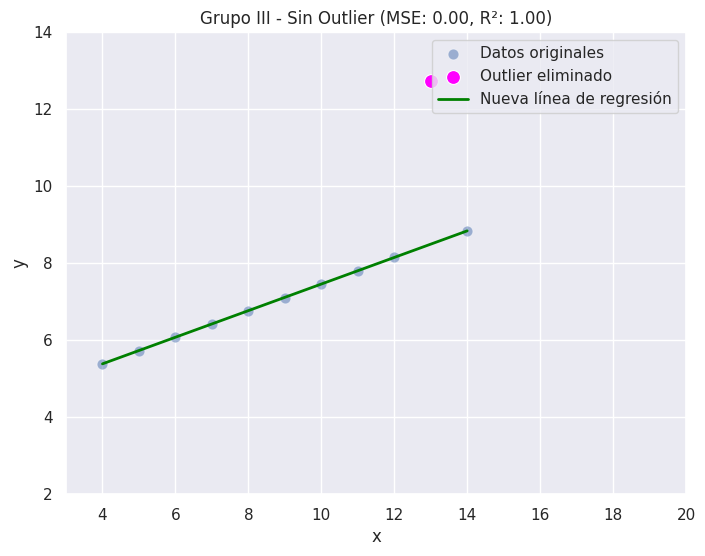

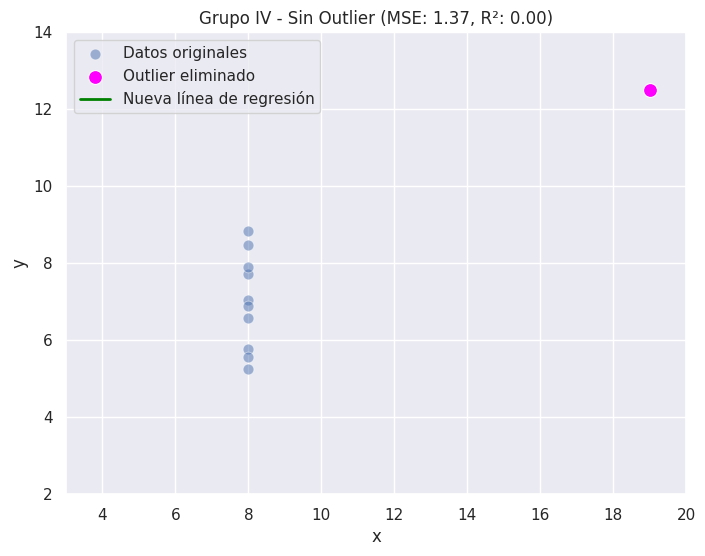

In [17]:
#Cambiar III

#Eliminar outlier
outlier_index_III = subset_III['y'].idxmax()
subset_III_cleaned = subset_III.drop(outlier_index_III)

X_III_cleaned = subset_III_cleaned[['x']]
y_III_cleaned = subset_III_cleaned['y']


model_III_cleaned = LinearRegression()
model_III_cleaned.fit(X_III_cleaned, y_III_cleaned)
y_pred_III_cleaned = model_III_cleaned.predict(X_III_cleaned)

mse_III_cleaned = mean_squared_error(y_III_cleaned, y_pred_III_cleaned)
r2_III_cleaned = r2_score(y_III_cleaned, y_pred_III_cleaned)


plt.figure(figsize=(8, 6))
sns.scatterplot(data=subset_III, x='x', y='y', label='Datos originales', alpha=0.5, s=60)
sns.scatterplot(x=[subset_III.loc[outlier_index_III, 'x']], y=[subset_III.loc[outlier_index_III, 'y']], color='magenta', s=100, label='Outlier eliminado')
sns.lineplot(x=X_III_cleaned['x'], y=y_pred_III_cleaned, color='green', linewidth=2, label='Nueva línea de regresión')
plt.title(f'Grupo III - Sin Outlier (MSE: {mse_III_cleaned:.2f}, R²: {r2_III_cleaned:.2f})')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(3, 20)
plt.ylim(2, 14)
plt.legend()
plt.grid(True)
plt.show()

#Cambiar IV

#este me dio mal, pero tiene sentido si lo orientamos así ya que no hay datos para atrás

#Eliminar outlier
outlier_index_IV = subset_IV['y'].idxmax()
subset_IV_cleaned = subset_IV.drop(outlier_index_IV)

X_IV_cleaned = subset_IV_cleaned[['x']]
y_IV_cleaned = subset_IV_cleaned['y']

model_IV_cleaned = LinearRegression()
model_IV_cleaned.fit(X_IV_cleaned, y_IV_cleaned)
y_pred_IV_cleaned = model_IV_cleaned.predict(X_IV_cleaned)

mse_IV_cleaned = mean_squared_error(y_IV_cleaned, y_pred_IV_cleaned)
r2_IV_cleaned = r2_score(y_IV_cleaned, y_pred_IV_cleaned)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=subset_IV, x='x', y='y', label='Datos originales', alpha=0.5, s=60)
sns.scatterplot(x=[subset_IV.loc[outlier_index_IV, 'x']], y=[subset_IV.loc[outlier_index_IV, 'y']], color='magenta', s=100, label='Outlier eliminado')
sns.lineplot(x=X_IV_cleaned['x'], y=y_pred_IV_cleaned, color='green', linewidth=2, label='Nueva línea de regresión')
plt.title(f'Grupo IV - Sin Outlier (MSE: {mse_IV_cleaned:.2f}, R²: {r2_IV_cleaned:.2f})')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(3, 20)
plt.ylim(2, 14)
plt.legend()
plt.grid(True)
plt.show()